# Unsupervised Machine Learning for the Classification of Astrophysical X-ray Sources
###### *Víctor Samuel Pérez Díaz<sup>1</sup>, Rafael Martinez-Galarza<sup>2</sup>, Alexander Caicedo-Dorado<sup>1</sup>, Raffaele D'Abrusco<sup>2</sup>*

*1. Universidad del Rosario, 2. Center for Astrophysics | Harvard & Smithsonian*

---

#### Predominance in clusters

Here we are going to analyze the predominance of classes extracted from SIMBAD in each cluster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
import math
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Edit the font, font size, and axes width

mpl.rcParams['font.family'] = 'Avenir LT Std'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

In [3]:
sim_data = pd.read_csv('sim_data_2mass.csv')
sim_df = sim_data[['name', 'cluster', 'main_type']]
sim_df_clean = sim_df.copy(deep=True).fillna('NaN')

In [4]:
def create_summary_tables(df):
    tables = []
    for n in np.unique(df.cluster):
        data_n = df[sim_df_clean.cluster == n]
        count_obs = data_n.groupby(['main_type']).size()
        df_n = pd.concat([count_obs],axis=1)
        df_n = df_n.rename(columns={0:'size'})
        tables.append(df_n)
    return tables

In [5]:
tables = create_summary_tables(sim_df_clean)

In [6]:
cl = 5
quer = tables[cl].sort_values(by='size', ascending=False).head(10)
quer

,size
main_type,
Orion_V*,352
YSO,276
NaN,137
Star,130
TTau*,72
Candidate_YSO,32
BYDra,31
X,13
Em*,11


#### Probability plots

We are going to produce some probability distribution plots in order to compare the different results from our pipelines. In order to separate observations we can do two things, separate them by using our assigned main_type, or selecting the clusters that have a particular predominance.

We are going with the second to select the observations that were used in the first x-ray pipeline. We observed that clusters 1, 2 and 3 tended to have a predominance in AGN and QSO.

In [7]:
sim_data_xray = pd.read_csv('gmm6_allvar_0_simbad.csv')

In [8]:
cl0_xray = pd.read_csv('./class_data_xray/cl0_mean.csv')
cl1_xray = pd.read_csv('./class_data_xray/cl1_mean.csv')
cl2_xray = pd.read_csv('./class_data_xray/cl2_mean.csv')
cl3_xray = pd.read_csv('./class_data_xray/cl3_mean.csv')
cl4_xray = pd.read_csv('./class_data_xray/cl4_mean.csv')
cl5_xray = pd.read_csv('./class_data_xray/cl5_mean.csv')

cl0_optixray = pd.read_csv('./class_data_2mass/cl0.csv')
cl1_optixray = pd.read_csv('./class_data_2mass/cl1.csv')
cl2_optixray = pd.read_csv('./class_data_2mass/cl2.csv')
cl3_optixray = pd.read_csv('./class_data_2mass/cl3.csv')
cl4_optixray = pd.read_csv('./class_data_2mass/cl4.csv')
cl5_optixray = pd.read_csv('./class_data_2mass/cl5.csv')

In [9]:
intra_xray_names = np.concatenate([np.unique(cl0_xray.name), np.unique(cl4_xray.name), np.unique(cl5_xray.name)])
optixray_names = np.unique(sim_data.name)

In [13]:
intra_names = np.intersect1d(intra_xray_names, optixray_names)

In [14]:
len(intra_names)

670

In [48]:
src_nname = intra_names[123]
print(src_nname)

2CXO J053908.6+261524


In [49]:
sim_data[sim_data.name == src_nname][['name', 'obsid', 'cluster']]

,name,obsid,cluster
4051,2CXO J053908.6+261524,8242,5


In [51]:
sim_data_xray[sim_data_xray.name == src_nname][['name', 'obsid', 'cluster']]

,name,obsid,cluster
8916,2CXO J053908.6+261524,8242,0


In [52]:
def generate_probability_plot(src_name, src_obsid, df1, df2):
    probas1 = df1[(df1.name == src_name) & (df1.obsid == src_obsid)]
    probas1 = probas1.iloc[:, -5:]
    print(probas1)
    print(probas1.columns)
    probas2 = df2[(df2.name == src_name) & (df2.obsid == src_obsid)]
    probas2 = probas2.iloc[:, -5:]
    plt.plot(probas1.columns, probas1.iloc[0], marker='^', color='green', linestyle='dashed')
    plt.plot(probas2.columns, probas2.iloc[0], marker='o', color='blue')
    plt.title('Probabilities for ' + src_name + ', obsid: ' + str(src_obsid))
    plt.legend(['CSC + 2MASS', 'CSC'])
    plt.ylim([0, 1])
    plt.xticks(rotation=90)
    plt.show()

       BYDra  Candidate_YSO  Orion_V*     TTau*       YSO
75  0.221313       0.215498  0.187044  0.196609  0.179536
Index(['BYDra', 'Candidate_YSO', 'Orion_V*', 'TTau*', 'YSO'], dtype='object')


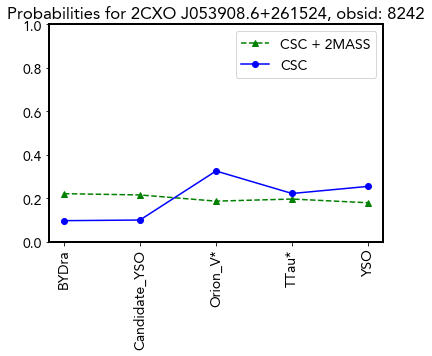

In [53]:
generate_probability_plot(src_nname, 8242, cl5_optixray, cl0_xray)

Comparing multiple observations classification probabilities:

1. Merge all the optixray classification tables.
2. Merge a particular xray table with the table created in 1.
3. Visualize in two different ways: putting all the observations in one plot, or plotting by observation.

In [69]:
# Merge all the optixary classification tables.
optixray_all = pd.DataFrame(columns=['name', 'obsid'])
optixray_all = optixray_all.merge(cl0_optixray, how='right', on=['name', 'obsid'])
optixray_all = optixray_all[['name', 'obsid', 'main_type', 'HMXB', 'Orion_V*', 'Seyfert_1', 'Seyfert_2', 'YSO']]
optixray_all = pd.concat([optixray_all, cl1_optixray.iloc[:, np.r_[1:3,41:47]]])
optixray_all = pd.concat([optixray_all, cl2_optixray.iloc[:, np.r_[1:3,41:47]]])
optixray_all = pd.concat([optixray_all, cl3_optixray.iloc[:, np.r_[1:3,41:47]]])
optixray_all = pd.concat([optixray_all, cl4_optixray.iloc[:, np.r_[1:3,41:47]]])
optixray_all = pd.concat([optixray_all, cl5_optixray.iloc[:, np.r_[1:3,41:47]]])

In [72]:
optixray_all

,name,obsid,main_type,HMXB,Orion_V*,Seyfert_1,Seyfert_2,YSO,Candidate_YSO,TTau*,IR>30um,GlCl,QSO,BYDra
0,2CXO J000209.6+232304,14898,Seyfert_1,0.180497,0.238379,0.264547,0.130681,0.185895,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J001524.0+171401,10547,HMXB,0.248332,0.164348,0.165319,0.210358,0.211644,NaN,NaN,NaN,NaN,NaN,NaN
2,2CXO J005327.8+563410,5424,YSO,0.230228,0.214273,0.186148,0.136179,0.233170,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J005758.4-722228,14671,HMXB,0.239519,0.155997,0.173737,0.233072,0.197674,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J005758.4-722228,15504,HMXB,0.274384,0.175076,0.173024,0.177135,0.200380,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2CXO J203815.8+423148,8893,YSO,NaN,0.207976,NaN,NaN,0.237987,0.198112,0.180076,NaN,NaN,NaN,0.175849
277,2CXO J223219.5+392351,11737,Candidate_YSO,NaN,0.177713,NaN,NaN,0.173362,0.223139,0.210206,NaN,NaN,NaN,0.215580
278,2CXO J225615.3+620454,8898,YSO,NaN,0.197759,NaN,NaN,0.229630,0.210601,0.179950,NaN,NaN,NaN,0.182059
279,2CXO J225719.7+615825,8898,YSO,NaN,0.210046,NaN,NaN,0.230975,0.196642,0.184606,NaN,NaN,NaN,0.177731


In [73]:
# Merge a particular xray table with the table created in 1.

x_plus_optixray = pd.DataFrame(data=cl1_xray.iloc[:, 1:])
x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])

In [74]:
x_plus_optixray

,name,obsid,main_type_xray,AGN,Candidate_XB*,Orion_V*_xray,QSO_xray,YSO_xray,main_type_optixray,HMXB,Orion_V*_optixray,Seyfert_1,Seyfert_2,YSO_optixray,Candidate_YSO,TTau*,IR>30um,GlCl,QSO_optixray,BYDra
0,2CXO J000144.7+131150,8491,QSO,0.224380,0.107031,0.188369,0.250025,0.230195,QSO,NaN,0.206768,0.189421,NaN,0.195465,NaN,NaN,NaN,0.199220,0.209125,NaN
1,2CXO J000144.7+131150,6978,QSO,0.260091,0.089838,0.176090,0.273833,0.200148,QSO,NaN,0.206422,0.190996,NaN,0.191053,NaN,NaN,NaN,0.198277,0.213252,NaN
2,2CXO J001034.0-250449,9547,QSO,0.160132,0.143115,0.168145,0.291010,0.237598,QSO,NaN,0.172501,0.211514,NaN,0.167453,NaN,NaN,NaN,0.223483,0.225049,NaN
3,2CXO J002111.3-084140,4102,Orion_V*,0.000192,0.028635,0.617244,0.000002,0.353928,Orion_V*,NaN,0.232386,0.194607,NaN,0.190365,NaN,NaN,NaN,0.170586,0.212056,NaN
4,2CXO J002756.6+261651,3249,Orion_V*,0.002375,0.061182,0.682398,0.001878,0.252167,QSO,NaN,0.214140,0.197448,NaN,0.185067,NaN,NaN,NaN,0.179918,0.223427,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2CXO J235325.1-465942,13506,AGN,0.522675,0.009259,0.139105,0.116326,0.212634,QSO,NaN,0.203882,0.192124,NaN,0.192608,NaN,NaN,NaN,0.197147,0.214238,NaN
940,2CXO J235728.3-322051,13439,QSO,0.391487,0.000496,0.047532,0.461460,0.099024,QSO,NaN,0.204016,0.185220,NaN,0.196655,NaN,NaN,NaN,0.203842,0.210267,NaN
941,2CXO J235915.7-322644,3954,QSO,0.372330,0.000710,0.092585,0.433056,0.101318,QSO,NaN,0.203795,0.200141,NaN,0.186834,NaN,NaN,NaN,0.204420,0.204810,NaN
942,2CXO J235925.6-500754,11864,QSO,0.204841,0.165272,0.198726,0.244838,0.186323,QSO,NaN,0.190234,0.198857,NaN,0.183299,NaN,NaN,NaN,0.202862,0.224748,NaN


In [91]:
# visualize

def gen_general_prob_plots(xray_cl):
    x_plus_optixray = pd.DataFrame(data=xray_cl.iloc[:, 1:])
    x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])
    
    colors = cm.get_cmap('tab10', 5)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_ylim(-0.05, 1)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
    ax.set_xlabel('Class', labelpad=10)
    ax.set_ylabel('Probability', labelpad=10)
    for index, row in x_plus_optixray.iterrows(): 
        probas1 = row[3:x_plus_optixray.columns.get_loc('main_type_optixray')]
        probas2 = row[x_plus_optixray.columns.get_loc('main_type_optixray')+1:]
        
        p1_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas1.index if ~np.isnan(probas1[x])]
        p2_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas2.index if ~np.isnan(probas2[x])]
        p1_val = [x for x in probas1.values if ~np.isnan(x)]
        p2_val = [x for x in probas2.values if ~np.isnan(x)]
        ax.plot(p1_in, p1_val, marker='o', color=colors(0), lw=0.15, alpha=0.6, ms=2)
        ax.plot(p2_in, p2_val, marker='^', color=colors(1), lw=0.2,ms=5)

    ax.legend(['CSC', 'CSC + 2MASS'], bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
    plt.title('Probability distributions X-ray cluster 0')
    plt.xticks(rotation=90)
    #plt.savefig('figures/xraycl0_2mass.png', dpi=300, transparent=False, bbox_inches='tight')

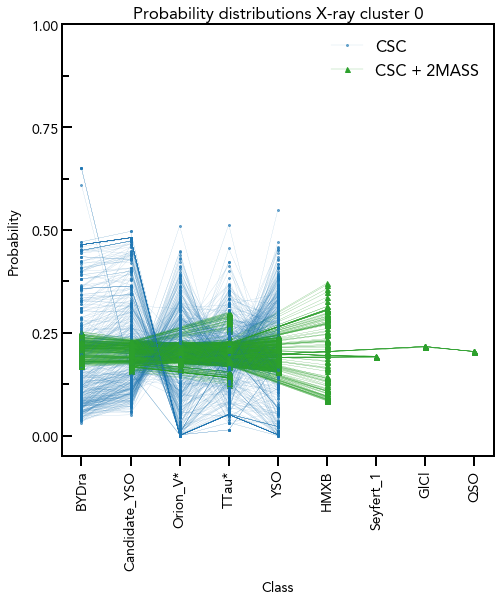

In [92]:
gen_general_prob_plots(cl0_xray)

In [93]:
def gen_particular_prob_plots(xray_cl):
    x_plus_optixray = pd.DataFrame(data=xray_cl.iloc[:, 1:])
    x_plus_optixray = x_plus_optixray.merge(optixray_all, how='inner', on=['name', 'obsid'], suffixes=['_xray', '_optixray'])
    
    colors = cm.get_cmap('tab10', 5)
    
    nrow = 40; ncol = 6;
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(14,84))
    #fig.subplots_adjust(left=0.125, bottom=0.6, right=0.9, top=0.9)
    fig.tight_layout(h_pad=8)
    for i, ax in enumerate(axs.reshape(-1)): 
        ax.set_ylim(-0.05, 1)
        ax.yaxis.set_tick_params(which='major', size=6, width=0.5, direction='in')
        ax.yaxis.set_tick_params(which='minor', size=3, width=0.5, direction='in')
        ax.xaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax.xaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
        #ax.set_xlabel('Class', labelpad=10)
        #ax.set_ylabel('Probability', labelpad=10)
         
        row = x_plus_optixray.loc[i]
        probas1 = row[3:x_plus_optixray.columns.get_loc('main_type_optixray')]
        probas2 = row[x_plus_optixray.columns.get_loc('main_type_optixray')+1:]
        
        p1_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas1.index if ~np.isnan(probas1[x])]
        p2_in = [x.replace('_xray', '').replace('_optixray', '') for x in probas2.index if ~np.isnan(probas2[x])]
        p1_val = [x for x in probas1.values if ~np.isnan(x)]
        p2_val = [x for x in probas2.values if ~np.isnan(x)]
        ax.plot(p1_in, p1_val, marker='o', color=colors(0), lw=1, ms=5, label='CSC')
        ax.plot(p1_in, p2_val, marker='^', color=colors(1), lw=1,ms=5, label='CSC + 2MASS', linestyle='dashed')
        
        ax.set_title(row['name']+', '+str(row['obsid']), fontsize=8)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
        handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.01))
    
    plt.savefig('figures/xray0_longplot_2mass.pdf', dpi=300, transparent=False, bbox_inches='tight')

'AvenirLTStd-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


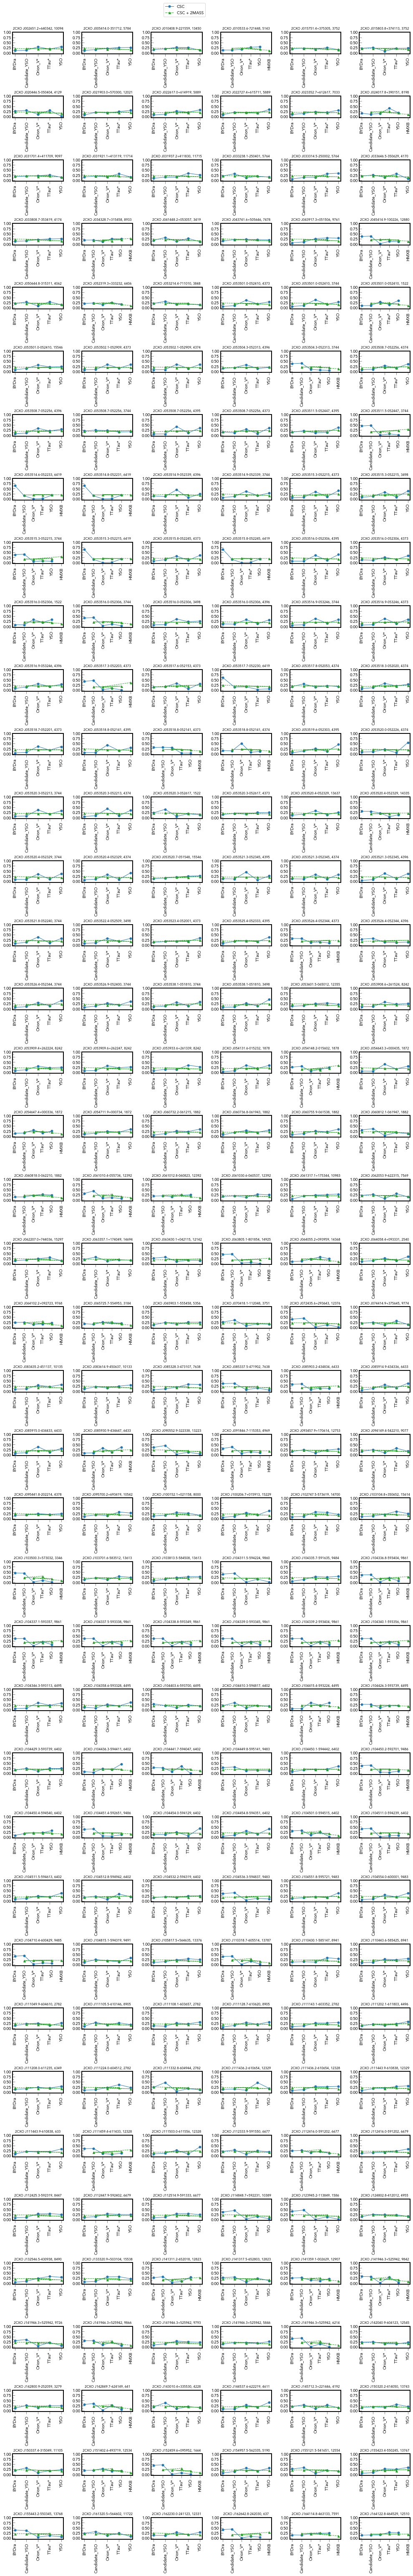

In [94]:
plt.rcParams['font.size'] = 10
gen_particular_prob_plots(cl0_xray)